Занятие 5. Проверка статистических гипотез.
====================

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>


Большинство из этих функций вовзращает два значения (бывает и больше). Но всегда первое из них -- значение статистики критерия, второе -- p-value. Нам будет интересно именно p-value.

Замечание. В реализациях критериев Стьюдента и Манна-Уитни-Уилкоксона нет возможности задать одностороннюю альтернативную гипотезу. В этих случаях нулевую гипотезу нужно отвергать, если $\frac{\text{p-value}}{2} < \alpha$.

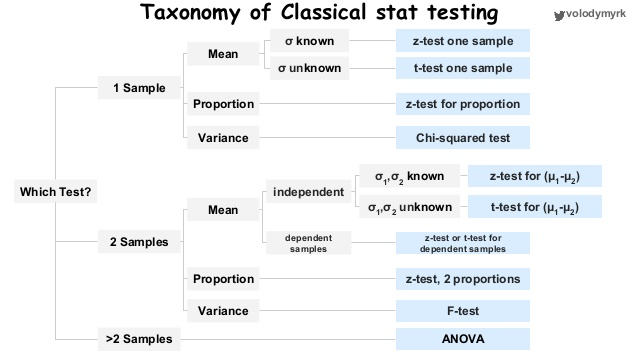

In [18]:
from IPython.display import Image
# https://www.slideshare.net/vladimirkazantsev/how-to-concludeonlineexperimentsinpython
Image("stat_tests.jpg")

Пример 1. Проверка нормальности распределения
---------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os
os.chdir("c:/aaa/temp_py/Shad_Python_06_2/")

In [3]:
df = pd.read_csv('town_1959_2.csv', encoding='cp1251')
df = df.set_index(u'номер')

(array([  1.,   8.,  24., 127., 408., 302.,  88.,  33.,  11.,   2.]),
 array([-1.        , -0.52970528, -0.05941055,  0.41088417,  0.8811789 ,
         1.35147362,  1.82176835,  2.29206307,  2.7623578 ,  3.23265252,
         3.70294725]),
 <a list of 10 Patch objects>)

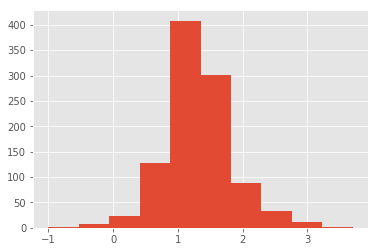

In [4]:
plt.hist(np.log10(df[u'население']))

In [5]:
res = stats.shapiro(np.log10(df[u'население']))
print('p-value: ', res[1])

p-value:  3.1486824866172602e-12


p-value получился маленьким (меньше $\alpha = 0.01, 0.05$). А почему получилось не нормальное распределение? Гистограмма же была колоколообразной. Станет понятнее, если увеличить число столбцов.

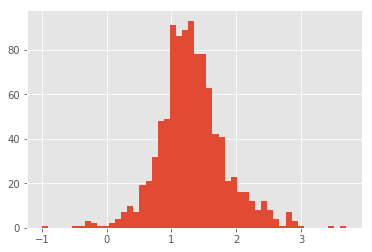

In [6]:
plt.hist(np.log10(df[u'население']), bins=50);

Пример 2. Критерий Манна-Уитни. Дома в Альбукерке (на углу VS не на углу)
===============

In [8]:
df = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')

In [9]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Хотим проверить, что цены домов на углу (```COR = 1```) отличаются от цен домов не на углу (```COR = 0```). Хотим попробовать применить критерий Стьюдента, но предварительно нужно:
1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

Очевидно, что значение -9999 здесь употребляется в качестве пустого значения. Нужно заменить его на корректное пустое значение.

In [10]:
df = df.replace(-9999, np.nan)

In [11]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [12]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

Проверяем нормальность распределений. 

In [23]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

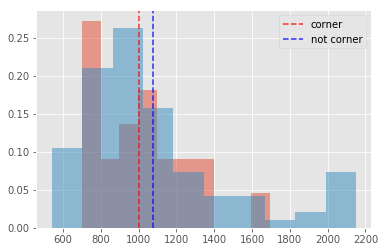

In [24]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (красной) гистограмме это не поможет. Выброс у неё всего один, и его удаление не сделает данные более нормальными: слишком уж большой крайний левый столбик. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (дома). Поэтому нам остаётся критерий Манна-Уитни.

In [16]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.402204078621


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: цены домов различаются незначимо -- разница медиан в выборках случайна.

Пример 3. Дома в Альбукерке (северо-восток VS остальные)
=========================

In [25]:
# df загружен в предыдущем примере
x = df[df['NE'] == 1]['PRICE']
y = df[df['NE'] == 0]['PRICE']
x.name, y.name = 'NE', 'not NE'

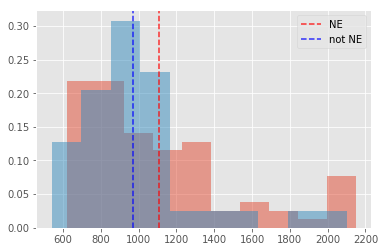

In [26]:
two_histograms(x, y)

In [16]:
# stats.median_test(x, y)

Пример 4. Критерий Стьюдента для независимых выборок. 
Возраст, в котором умирают европейские аристократы.
=====================

Данные о возрасте, в котором умирали европейцы в середине 19 века, в зависимости от их класса (sovereignty, aristocracy, and gentry).

In [27]:
df = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None, names=['group', 'age', 'index'])

In [28]:
df.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [29]:
x = df[df['group'] == 'sovr']['age']
y = df[df['group'] == 'aris']['age']
x.name, y.name = 'sovr', 'aris'

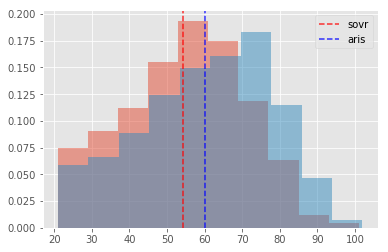

In [30]:
two_histograms(x, y)

Данные условно нормальны. Проверим c помощью критерия Флигнера-Килина, равны ли дисперсии.

In [24]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.000101160771038


Значение p-value низкое, поэтому гипотезу о равенстве дисперсий отвергаем. В двух выборках находятся разные наблюдаемые объекты, то есть выборки несвязные. Итого, гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=False```.

In [21]:
res = stats.ttest_ind(x, y, equal_var=False)
print()'p-value: ', res[1])

p-value: 1.51811841977e-26


Пример 5. Критерий Стьюдента для парных выборок. 
Чтение названий цветов
=================

Исследование 1935 года, в котором изучалась скорость чтения названий цветов в зависимости от того, шрифт какого цвета использовался.

In [22]:
df = pd.read_csv('interference.csv')

In [23]:
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [24]:
x = df['DiffCol']
y = df['Black']
x.name, y.name = 'DiffCol', 'Black'

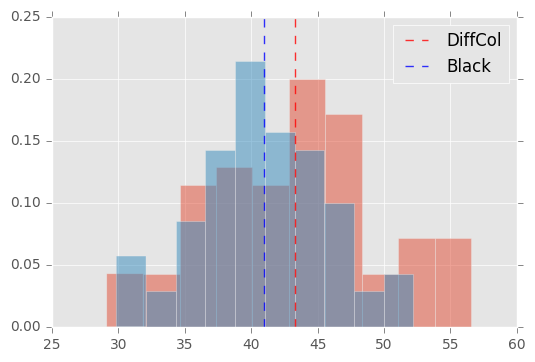

In [25]:
two_histograms(x, y)

Распределения условно нормальны.  Поскольку в наблюдениях содержатся одни и те же люди, которых просили прочитать различные шрифты, поэтому выбоки у нас связные, а значит используем ```ttest_rel```.

In [26]:
res = stats.ttest_rel(x, y)
print('p-value: ', res[1])

p-value: 0.0162416779538


p-value получился довольно низким, но возможно не таким низким, как хотелось бы. На уровне значимости 0.05 гипотеза будет отвергнута, но на уровне 0.01 уже нет. Решение за исследователем. Всё зависит от того, насколько сильно мы боимся ошибки первого рода, насколько сильно мы должны ручаться за выводы.

Пример 6. Популярность кандидата.
=================
В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе.

Проверять будем критерием хи-квадрат. Сначала построим таблицу сопряжённости.

In [27]:
contingency_table = pd.DataFrame([[28, 72], [20, 80]],
                                 index=['city', 'country'],
                                 columns=['for', 'against'])
contingency_table

,for,against
city,28,72
country,20,80


In [28]:
res = stats.chi2_contingency(contingency_table)
print 'p-value: {0}'.format(res[1])

p-value: 0.246470120692


p-value получился достаточно большим, поэтому оснований отвергнуть гипотезу о равенстве долей нет.

Пример 7. Корреляция цены и площади домов в Альбукерке.
--------------------

In [30]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [31]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Проверим очевидный факт, что площадь дома коррелирует с его ценой.

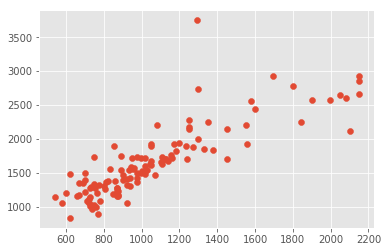

In [35]:
plt.scatter(df['PRICE'], df['SQFT'])

In [36]:
res = stats.pearsonr(df['PRICE'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.844795098555
p-value:  5.14634570763e-33


In [37]:
df = df.replace(-9999, np.nan)

res = stats.pearsonr(df['TAX'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  nan
p-value:  1.0


C:\Users\abbat_VL\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
